# Data Byte: Hypothesis Testing
In this Notebook, we investigate Spotify's Today’s Top Hits playlist for gender bias. At the time this is being done (December 2020), Spotify's Today Top Hits playlist has **over 27** ___million___ followers, making it without a doubt one of the most influential streaming playlists of our digital music age. With more than [20 billion streams](https://newsroom.spotify.com/2019-12-16/spotifys-biggest-playlist-todays-top-hits-celebrates-25-million-followers/), the playlist not only reflects but shapes our music culture. Therefore, how well does Today's Top Hits include gender diversity? 

**Null Hypothesis:** Cisgender male artists represent only half of the artists in Spotify's Today’s Top Hits playlists.

**Alternative Hypothesis:** Spotify's Today’s Top Hits playlist contains a gender bias that favors cisgender male artists. 

We recognize the null hypothesis uses notions of the gender binary, but the hypothesis aims to test the lowest possible threshold for gender diversity in which at least half of the artists are not cisgender male (i.e. women, nonbinary, gender fluid, trans, etc.). 

**Table of Contents**  
1. [Retrieve Data](#part1)  
2. [Collect Count of Cisgender Male Artists per Playlist](#part2)       
3. [Explore the Proportions](#part3)
4. [Hypothesis Testing](#part4)  
5. [Visualizations](#part5)  
    a. [Pictogram](#part5-a)  
    b. [Area Plot](#part5-b)

<a id = "part1"></a>
## 1. Retrieve Data
In a [previos Jupyter Notebook](https://github.com/JLopezRuiz/spotify-gender-bias-databyte/blob/main/data_collection.ipynb), we have extracted and saved playlist archives into csv files. Here, we simply take those csv files and store their data in dataframes. 

In [22]:
import csv
import pandas as pd

In [23]:
#List of file names
playlists =['may2019', 'june2019-1', 'june2019-2', 'july2019-1', 'july2019-2', 'august2019-1',
            'august2019-2', 'september2019-1', 'september2019-2', 'october2019-1', 
            'october2019-2', 'november2019-1', 'november2019-2', 'december2019-1', 
            'december2019-2', 'january2020-1', 'january2020-2', 'february2020-1', 
            'february2020-2', 'march2020-1', 'march2020-2', 'april2020-1', 'april2020-2', 
            'may2020-1', 'may2020-2', 'june2020-1', 'june2020-2', 'july2020-1', 'july2020-2', 
            'august2020-1', 'august2020-2', 'september2020-1', 'september2020-2', 
            'october2020-1', 'october2020-2', 'november2020-1', 'november2020-2']


In [24]:
def getData():
    """Takes a list of file names and saves playlist data in a dataframe. 
    Returns a list of dataframes"""
    dataframes = []
    
    for playlist in playlists:
        df = pd.read_csv('spotify_playlist_archives/'+playlist+'.csv', index_col ='Unnamed: 0')
        dataframes.append(df)
    
    return dataframes

In [25]:
data = getData()

<a id = "part2"></a>
## 2. Collect Count of Cisgender Male Artists per Playlist

**Step 1: Load library of all of the artist's genders**  
_Note: Similarly to [part 1](#part1), we created an internal library of all of the artist's genders in a [previous Jupyter Notebook](https://github.com/JLopezRuiz/spotify-gender-bias-databyte/blob/main/Gender_Classifier.ipynb). Therefore, here, we're simply loading it._

In [26]:
import json

In [27]:
# Opening JSON file 
d = open('artists_gender_library.json',)
   
# Read the content of the file with json.load
library = json.load(d) 

# 281 total number of single artists found across all the playlist archives  
print('Entries:',len(library))

Entries: 281


**Step 2: Count all the cisgender male artists in each playlist**   
_Note: We have chosen to remove all groups and bands from the playlist to avoid miscounting the total number of people for any specific gender. Additionally, we deliberately chose to count the number of cisgender male artists to compare those values against the sum of women, non-binary, gender fluid, and any other gender identities._

In [28]:
data[0].head()

,title,artists,album,length
0,If I Can't Have You,Shawn Mendes,If I Can't Have You,3:10
1,I Don't Care (with Justin Bieber),"Ed Sheeran, Justin Bieber",I Don't Care (with Justin Bieber),3:39
2,bad guy,Billie Eilish,"WHEN WE ALL FALL ASLEEP, WHERE DO WE GO?",3:14
3,Summer Days (feat. Macklemore & Patrick Stump ...,"Martin Garrix, Macklemore, Fall Out Boy",Summer Days (feat. Macklemore & Patrick Stump ...,2:43
4,EARFQUAKE,"Tyler, The Creator",IGOR,3:10


In [29]:
# Since some tracks on the playlist have more than one artist (as can be seen above),
# we need to create a list of all artists that appear in the playlist 
def getAllArtists(df):
    """Given a playlist, returns a set of all artist appearances"""
    artists = []
    
    for i in range(50): #all playlists only have 50 songs  
        artists.extend(df['artists'][i].split(','))
    
    return set(artists)
    
def countCisMaleArtists(artists):
    """Given a set of artists, classifies the gender of all single artists using our library. 
    Returns proportion of cisgender male artists, non cisgender male artists, and total 
    in the playlist."""
    totalArtists = 0
    genderDict = {'female':[],'male':[],'genderfluid':[],'non-binary':[]}
    
    for artist in artists:
        if artist in library:
            totalArtists += 1
            gender = library[artist]
            genderDict[gender].append(artist)
            
    male = len(genderDict['male'])
    nonmale = (totalArtists-len(genderDict['male'])) 
    
    return (male, nonmale, totalArtists)

In [30]:
observed_differences = []
male_proportion = []
nonmale_proportion = []
totalArtists = []

for i in data:
    artists = getAllArtists(i)
    male, nonmale, total = countCisMaleArtists(artists)
    observed_differences.append(male-nonmale) # difference between male and non-male artists
    male_proportion.append(male/total)
    nonmale_proportion.append(nonmale/total)
    totalArtists.append(total)

print(observed_differences) 

[22, 21, 22, 22, 14, 12, 11, 11, 10, 13, 7, 7, 11, 13, 13, 16, 16, 13, 13, 12, 16, 18, 19, 18, 20, 17, 16, 19, 22, 14, 14, 12, 16, 17, 16, 15, 10]


<a id = 'part3'></a>
## 3. Explore the Proportions
We will compare the proportion of cis male and non-cis male artists in our samples.

In [31]:
from pandas import Series
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [32]:
cMale = Series(male_proportion)
cMale.describe()

count    37.000000
mean      0.691061
std       0.047210
min       0.606061
25%       0.657895
50%       0.690476
75%       0.714286
max       0.789474
dtype: float64

In [33]:
ncMale = Series(nonmale_proportion)
ncMale.describe()

count    37.000000
mean      0.308939
std       0.047210
min       0.210526
25%       0.285714
50%       0.309524
75%       0.342105
max       0.393939
dtype: float64

In [34]:
total = Series(totalArtists)
total.describe()

count    37.000000
mean     39.243243
std       3.121657
min      33.000000
25%      37.000000
50%      39.000000
75%      42.000000
max      44.000000
dtype: float64

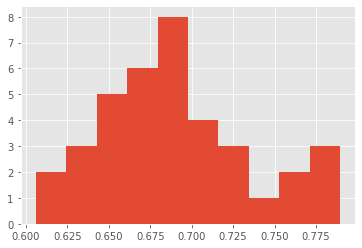

In [35]:
plt.hist(cMale)
plt.show()

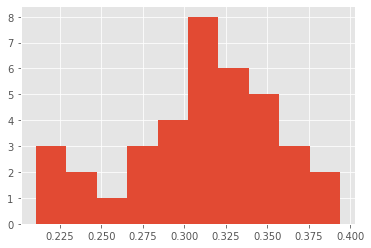

In [36]:
plt.hist(ncMale)
plt.show()

We can see that the largest group for non-cis male artists is below 40% and the first group for cis male artists begins at 60%. These distributions already show that cis male artists are more present on Today's Top Hits.

<a id = 'part4'></a>
## 4. Hypothesis Testing
To test our hypothesis, we perform a [sign test](https://en.wikipedia.org/wiki/Sign_test). We use the list of differences between cisgender male and non-cisgender male artists in every playlist record and test whether that difference is 0 or not. 

In [37]:
from scipy.stats import wilcoxon
from scipy import stats
from plotly.figure_factory import create_table

In [50]:
w, p = wilcoxon(observed_differences)
w,p

(0.0, 1.1021282157721723e-07)

The test statistic for the Wilcoxon Signed Rank Test is W, defined as the smaller of W+ and W- which are the sums of the positive and negative ranks, respectively. 

Since all the differences are positive, W+ = 37 (no. of archives collected) and W- = 0. The smaller of these values is 0.Thus, w = 0.0. 

In [51]:
matrix = [
    ['', 'Wilcoxon Test Statistic', 'p-value'],
    ['Data', w, p/2]
]

table = create_table(matrix, index=True)
table.show()

*Another similar test we tried is the paired t-test, since the two values (cis male and non-cis male artists) are paired every week.*

In [40]:
stat, p_value = stats.ttest_rel(male_proportion,nonmale_proportion )
stat, p_value

(24.61711737046961, 4.077673228155195e-24)

matrix2 = [
    ['', 'Paired T-Test Statistic', 'P-value'],
    ['Data', stat, p_value/2]
]

table2 = create_table(matrix2, index=True)
table2.show()

In [44]:
import statistics 
import matplotlib.pyplot as plt
from pywaffle import Waffle
import plotly.graph_objects as go

In [45]:
male_average = statistics.mean(male_proportion)
print(male_average)

0.6910612280985102


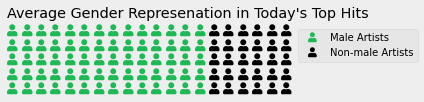

In [46]:
genderRep = {'Male Artists':male_average*100, 'Non-male Artists':(1-male_average)*100}
fig = plt.figure(
    FigureClass=Waffle,
    rows=5,
    values= genderRep,
    colors=["#1DB954", "#000000"],
    facecolor= '#EEEEEE',
    icons='user',
    font_size=12,
    title={'label': "Average Gender Represenation in Today's Top Hits", 'loc': 'left'},
    legend={'loc': 'upper left', 'bbox_to_anchor': (1, 1)},
    icon_legend=True
)

plt.savefig('average-gender-representation.png')

<a id = 'part5-b'></a>
### Cisgenger Male vs. Non-Cisgender Male Representation _Over Time_

In [47]:
p = {'male': male_proportion, 'non-male': nonmale_proportion}
propDF = pd.DataFrame(p)

In [48]:
dates = ['May 19', 'Jun 19', 'Jun 19-2', 'Jul 19', 'Jul 19-2', 'Aug 19', 'Aug 19-2', 'Sep 19', 
     'Sep 19-2', 'Oct 19', 'Oct 19-2', 'Nov 19', 'Nov 19-2', 'Dec 19', 'Dec 19-2', 'Jan 20', 
     'Jan 20-2', 'Feb 20', 'Feb 20-2', 'Mar 20', 'Mar 20-2', 'Apr 20', 'Apr 20-2', 'May 20', 
     'May 20-2', 'Jun 20', 'Jun 20-2', 'Jul 20', 'Jul 20-2', 'Aug 20', 'Aug 20-2', 'Sep 20', 
     'Sep 20-2', 'Oct 20', 'Oct 20-2', 'Nov 20']

plot = go.Figure(data=[go.Scatter( 
                        x = dates, 
                        y = propDF['non-male'], 
                        stackgroup = 'one',
                        name = 'Non-male',
                        fillcolor = 'rgb(255, 250, 205)'), 
                       go.Scatter( 
                        x = dates, 
                        y = propDF['male'], 
                        stackgroup = 'one',
                        name = 'Male',
                        fillcolor = 'rgb(173,216,230)')])

plot.update_layout(
    xaxis = dict(
        tickmode = 'array',
        tickvals = [0, 7, 14, 21, 28, 35],
        ticktext = ['May 2019', 'Sep 2019', 'Dec 2019', 'Apr 2020', 'Jul 2020', 'Nov 2020']
    ),
    yaxis_range = (0, 1),
    hovermode = 'x',
    margin = dict(pad = 10)
)


plot.update_layout(title_text = 'Proportions of Cis Male and Non-cis Male Artists on Today\'s Top Hits Over Time')
                   
plot.show()